In [1]:
import collections
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

In [2]:
summaries = pd.read_csv('sentences.csv')
summaries=summaries.head(100)
corpus =[]
for i in range(len(summaries)):
    
    
        text=summaries.iloc[i].summary

        sentences=sent_tokenize(text)
        for x in sentences :
            corpus.append(x)
#corpuss = [tokenize_text(sent) for sent in corpus ]

C:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


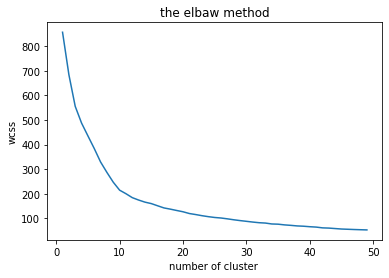

In [4]:



def word_tokenizer(text):
            #tokenizes and stems the text
            tokens = word_tokenize(text)
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
            return tokens


def cluster_sentences(corpus, nb_of_clusters):
            tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                            stop_words=stopwords.words('english'),
                                            max_df=0.9,
                                            min_df=0.1,
                                            lowercase=True)
            #builds a tf-idf matrix for the sentences
            tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
            kmeann = KMeans(nb_of_clusters)
            kmeann.fit(tfidf_matrix)
            clusters = collections.defaultdict(list)
            
            print('clusters')
            print(clusters)
            for i, label in enumerate(kmeann.labels_):
                    clusters[label].append(i)
            return dict(clusters)


if __name__ == "__main__":
            tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                            stop_words=stopwords.words('english'),
                                            max_df=0.9,
                                            min_df=0.1,
                                            lowercase=True)
          
            tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
            
            #kmeann = KMeans(n_clusters)
            #y=kmeann.fit(tfidf_matrix)
            import matplotlib.pyplot as plt
            wcss=[]
            for i in range(1,50):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
                kmeans.fit(tfidf_matrix)
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,50),wcss)
            plt.title('the elbaw method')
            plt.xlabel("number of cluster ")
            plt.ylabel('wcss')
            plt.show()
          
            

In [5]:
n_clusters=20
clusters = cluster_sentences(corpus, n_clusters)
print(clusters)
for cluster in range(n_clusters):
    print ("cluster ",cluster,":")
    for i,sentence in enumerate(clusters[cluster]):
            print ("\tsentence ",i,": ",corpus[sentence])

C:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


clusters
defaultdict(<class 'list'>, {})
{4: [0, 10, 12, 72, 93, 115, 198, 217, 223, 252, 267, 317, 416, 445, 454, 566, 599, 673, 684, 708, 778, 829, 1009, 1052, 1123, 1181], 2: [1, 2, 3, 5, 6, 9, 20, 36, 37, 44, 49, 50, 58, 84, 88, 98, 100, 112, 120, 122, 123, 124, 130, 132, 135, 137, 141, 143, 147, 171, 187, 194, 195, 203, 204, 205, 206, 207, 208, 214, 222, 224, 226, 229, 230, 234, 235, 236, 238, 246, 253, 255, 257, 258, 259, 277, 300, 301, 312, 313, 314, 315, 324, 326, 330, 333, 338, 339, 344, 346, 349, 350, 361, 367, 372, 373, 374, 376, 377, 378, 382, 384, 391, 422, 427, 440, 447, 457, 459, 460, 470, 471, 472, 473, 476, 481, 485, 487, 488, 492, 517, 519, 522, 524, 542, 552, 553, 558, 565, 614, 617, 619, 622, 624, 625, 636, 637, 639, 660, 666, 685, 686, 688, 690, 691, 698, 732, 784, 892, 917, 926, 972, 974, 1068, 1076, 1093, 1094, 1095, 1101, 1104, 1120, 1129, 1133, 1180, 1188, 1191], 12: [4, 42, 46, 201, 220, 266, 272, 304, 307, 309, 311, 608, 629, 630, 707, 739, 742, 753, 846, 899

	sentence  116 :  current studies have shown that 2019-ncov has about an 89% 35 homology with bat sars-like-covzxc21 and 82% homology with human sars-cov .
cluster  4 :
	sentence  0 :  in broad terms the immune system among vertebrates is similar especially in regard to immune responses to virus infections.
	sentence  1 :  the purpose of the succeeding discussion is to highlight the responses to virus infection in domestic species on the ground that full understanding of the interplay between viruses and the immune system is essential in order to design the most efficient and practical antiviral measures.
	sentence  2 :  the infection has also occurred in newborns with apparently normal immune systems.
	sentence  3 :  the introduction: neutrophil extracellular traps nets are one of the immune systems to suppress dissemination of infection by the netted chromatin decorated with antibacterial molecules.
	sentence  4 :  the effect of sars-cov infection on the immune system is highlighted 

	sentence  29 :  superantigens have also been implicated in triggering autoimmune responses .
	sentence  30 :  the idea is to turn on a th2-type profile response in the target area.
	sentence  31 :  the studies showed that immunoglobulin g1 igg1 is related to a th2-type response while a th1 response is associated with the induction of igg2a and igg2b in mice 40 .
	sentence  32 :  no significant anti- l1 + l2 antibody responses could be detected in the sera of control groups thus the seroreactivities were completely l1 + l2 antigen-specific responses in mice.
	sentence  33 :  however optimal peptide-based vaccines should be presented in a desired secondary structure of peptides in order to induce a specific humoral response 41 42 .
	sentence  34 :  while being effective the antibody response was found to be short-lived in convalescent sars-cov patients tang et al 2011 .
	sentence  35 :  edema accumulation and airway epithelia damage is accompanied by an exacerbated proinflammatory respo

	sentence  21 :  of course some bacteria are certainly adapted to favor damage like encapsulated bacteria that prevent phagocytic cells from seeing them and therefore prevent their immediate elimination by the innate immune system of the host .
	sentence  22 :  it is important to remember though that this translational shutoff could also simply be the host cell s response to the infection.
	sentence  23 :  the expression of the formyl peptide receptors in a variety of cells other than phagocytic cells suggests that they might have functional roles beyond that of host defense in innate immune response.
	sentence  24 :  sequence similarity between the different ifit proteins within a species is high 44-98% identity 11 but they are differentially expressed depending on the cell and tissue type respond differently to ifn and different viruses and have different effects on replication of individual viruses suggesting that different ifits have non-redundant functions in the host response to 

	sentence  20 :  the oligomerization status of different ifit proteins was analyzed using the nativepage gel system invitrogen as per the manufacturer s instructions.
	sentence  21 :  these mutations lied on the surface of the protein which make covid-19 more superior than other previous strains by inducing its sustainability leaving the immune system in blind spot .
	sentence  22 :  doi doi: biorxiv preprint iedb website was used to analyze 2019-ncov envelope protein for t cell related peptides.
	sentence  23 :  thus the induction of n-specific immune responses in these animals emphasizes the potential usefulness of the mers-cov n protein to serve as vaccine antigen.
cluster  18 :
	sentence  0 :  currently the newly identified 2019-ncov is spreading to infect people resulting in significant global concerns.
	sentence  1 :  patients with resolved viral infection will develop a polyclonal antibody immune response to different viral antigens of 2019-ncov.
	sentence  2 :  however pregnant

In [6]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
#n_clusters = np.ceil(len(corpus)**0.5)
#print(n_clusters)
kmean = KMeans(n_clusters)
y=kmean.fit(tfidf_matrix)

    
sum_index,_ = pairwise_distances_argmin_min(y.cluster_centers_,tfidf_matrix,metric='euclidean')
#print(sum_index,_)    
sum_index = sorted(sum_index)
#print(sum_index)
for ind in sum_index:
    print(corpus[ind])
#summary = ' '.join([corpus[ind] for ind in sum_index])
#print(summary)

thus an immune response is mounted.
it is convenient to divide the immune system into several categories.
the infection has also occurred in newborns with apparently normal immune systems.
the pharmacia unicap system was studied.
is 2019-ncov.
some authors use the term more specifically for analogues that are not dependent on an immune response but act as an antagonist to in this case binding or cleavage.
responses were received between august and november 2013. we had 77 responses.
our aim was to describe the immune phenotype in human aki.
why some infants are severely affected requiring admission to hospital whilst others experience a simple cold is not fully understood: research has suggested that the innate immune response to these viruses is important.
all blood samples were analyzed using the eaa system.
a long-lived t-cell immune response develops in most infected immunocompetent persons and is responsible not only for recovery from infection but also for tissue pathologic chang